<a href="https://colab.research.google.com/github/gap1070/cs417-labs/blob/main/Lab10/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 10: Searching Analysis
Paste your completed search functions below, then work through the three experiments.

For each experiment: run the code, then answer the questions in the markdown cells.

In [1]:
def sequential_search(a_list, target):
    for item in a_list:
        if item == target:
            return True
    return False

def binary_search(a_list, target):
    first = 0
    last = len(a_list) - 1

    while first <= last:
        mid = (first + last) // 2

        if a_list[mid] == target:
            return True
        elif target < a_list[mid]:
            last = mid - 1
        else:
            first = mid + 1

    return False

def sequential_search_counted(a_list, target):
    comparisons = 0

    for item in a_list:
        comparisons += 1
        if item == target:
            return True, comparisons

    return False, comparisons

def binary_search_counted(a_list, target):
    first = 0
    last = len(a_list) - 1
    comparisons = 0

    while first <= last:
        mid = (first + last) // 2
        comparisons += 1

        if a_list[mid] == target:
            return True, comparisons
        elif target < a_list[mid]:
            last = mid - 1
        else:
            first = mid + 1

    return False, comparisons

In [ ]:
# Imports for the experiments
import random
import matplotlib.pyplot as plt


Experiment 1: The Comparison Race
Run both counted searches on sorted lists of increasing size and plot the comparison counts.

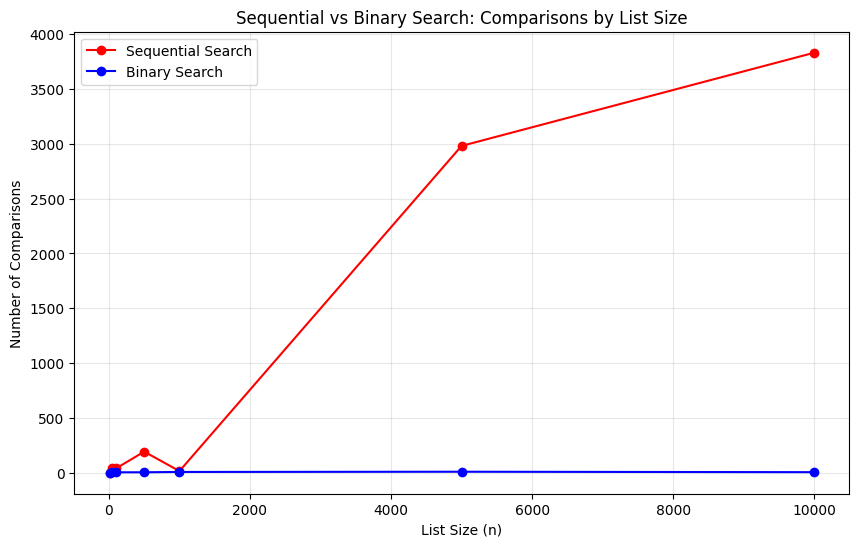

In [4]:
import random
import matplotlib.pyplot as plt

sizes = [10, 50, 100, 500, 1000, 5000, 10000]
seq_counts = []
bin_counts = []

for n in sizes:
    # Generate a sorted list of n items
    test_list = list(range(n))
    # Pick a random target (might or might not be in the list)
    target = random.randint(0, n)

    _, s_count = sequential_search_counted(test_list, target)
    _, b_count = binary_search_counted(test_list, target)

    seq_counts.append(s_count)
    bin_counts.append(b_count)

plt.figure(figsize=(10, 6))
plt.plot(sizes, seq_counts, 'o-', label='Sequential Search', color='red')
plt.plot(sizes, bin_counts, 'o-', label='Binary Search', color='blue')
plt.xlabel('List Size (n)')
plt.ylabel('Number of Comparisons')
plt.title('Sequential vs Binary Search: Comparisons by List Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Experiment 1 Questions
Q1: Describe the shape of each curve. Why does one grow so much faster than the other?

Your answer: Sequential search shows a straight line that is increasing alot. This is because this type of search checks ietms one by one, so the amount of comparisons that there are is alot more. Binary search forms a very slow growing curve that almost looks flat. This search just cuts the list in half each time, which makes it much slower than linear growth.

Q2: At what list size does the difference start to feel significant?

Your answer: The differenec begins to feel significant at around like 500 comparisons, and from there is just keeps going up. At 10,000 list size the comparisons are so different, the sequinetail is almost at 4000, and binary hasnt even gotten above 500.

Experiment 2: Best Case, Worst Case
How much does performance vary depending on where the target is (or if it's there at all)?

In [5]:
n = 10000
test_list = list(range(n))

# Sequential search: best case vs worst case
_, seq_best = sequential_search_counted(test_list, test_list[0])      # first element
_, seq_worst = sequential_search_counted(test_list, n + 1)            # not in list

print("=== Sequential Search (n = 10,000) ===")
print(f"Best case  (first element):  {seq_best} comparisons")
print(f"Worst case (not in list):    {seq_worst} comparisons")
print()

# Binary search: does target position matter?
_, bin_first = binary_search_counted(test_list, test_list[0])         # first element
_, bin_last = binary_search_counted(test_list, test_list[-1])         # last element
_, bin_mid = binary_search_counted(test_list, test_list[n // 2])      # middle element
_, bin_miss = binary_search_counted(test_list, n + 1)                 # not in list

print("=== Binary Search (n = 10,000) ===")
print(f"First element:    {bin_first} comparisons")
print(f"Last element:     {bin_last} comparisons")
print(f"Middle element:   {bin_mid} comparisons")
print(f"Not in list:      {bin_miss} comparisons")

=== Sequential Search (n = 10,000) ===
Best case  (first element):  1 comparisons
Worst case (not in list):    10000 comparisons

=== Binary Search (n = 10,000) ===
First element:    13 comparisons
Last element:     14 comparisons
Middle element:   13 comparisons
Not in list:      14 comparisons


Experiment 2 Questions
Q3: Why does sequential search have such a huge gap between best and worst case?

Your answer: Sequential search checks the elmets in order from the start. If the target is the very first element, then it only needs one omparison, which is the best case. But if the target is not even in the list, it is going to have to check every single other element which is the worse case. So thats why the gap is so big.

Q4: Why is binary search so consistent regardless of where the target is? What about the algorithm causes this?

Your answer: Binary search is so consistent beacseu it splits the list in hafl every time, no matter where the target is located. It doesnt have to scan throgh very element one by one, ike sequential does. Instead it keeps narrowing the search space down. So it will always take a some comparisons, but the amount is almost exact for every element.

Experiment 3: When Is Sorting Worth It?
Binary search requires sorted data, and sorting costs O(n log n). If you have an unsorted list and need to search it k times, when does it pay to sort first?

The two options:

Option A: Sequential search each time. Total cost: k × n
Option B: Sort first (n log n), then binary search each time. Total cost: n log n + k × log n
Q5: Calculate the crossover
For n = 10,000: set the two cost formulas equal and solve for k. Show your work.

Your answer: k * n = n log n + k log n

n = 10,000 and log^2(10000) = 13.3

k(10,000) = 10,000(13.3) + 13.3k

10000k = 133,000 + 13.3k
-13k             -13k

9,986.7k = 133000

k = 13.3

around 14 searchs

In [6]:
import math

n = 10000
log_n = math.log2(n)  # approximately 13.3

# Try different values of k and compare total costs
print(f"n = {n}, log2(n) ≈ {log_n:.1f}")
print(f"{'k':>5}  {'Option A (k×n)':>15}  {'Option B (n·log n + k·log n)':>30}  {'Winner':>8}")
print("-" * 65)

for k in [1, 2, 5, 10, 13, 14, 15, 20, 50, 100]:
    cost_a = k * n
    cost_b = n * log_n + k * log_n
    winner = "A" if cost_a < cost_b else "B" if cost_b < cost_a else "Tie"
    print(f"{k:>5}  {cost_a:>15,.0f}  {cost_b:>30,.0f}  {winner:>8}")

n = 10000, log2(n) ≈ 13.3
    k   Option A (k×n)    Option B (n·log n + k·log n)    Winner
-----------------------------------------------------------------
    1           10,000                         132,890         A
    2           20,000                         132,904         A
    5           50,000                         132,944         A
   10          100,000                         133,010         A
   13          130,000                         133,050         A
   14          140,000                         133,063         B
   15          150,000                         133,076         B
   20          200,000                         133,143         B
   50          500,000                         133,542         B
  100        1,000,000                         134,206         B


Experiment 3 Questions
Q6: Does the experimental crossover match your calculation? If not, why might they differ?

Your answer: The eperiment is the about same as the calculations, but may not match exactly. This is because the code doesn't factor in constant factors, and real world details that would affect the colculations. Python's sorting, and real comparison coasts can barley shift the crossover point.

Q7: Give a real-world example where you'd choose Option A (just search without sorting) and one where you'd choose Option B (sort first, then search).

Your answer: Option A: If you have a short list where you just need to search quickly 1 or 2 times then sequential is a fine chose. For example looks at a list of names and looking through it to see if theres the name you need there, like simple lists like that work perfectly.

Option B: Now if you have a very large database of like 10,000 users, and you are going to be searching it alot then you might need to use binary search. Being able to sort out 10,000 users might take a little but it wont take as long as going through 10,000 users one by one. An example of this